In [ ]:
!unzip "/content/gdrive/MyDrive/BurmeseCharactersDataSets.zip" -d "./"

In [148]:
import os
import matplotlib
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, ToPILImage, Resize, Compose, Grayscale
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
matplotlib.use("Agg")

%matplotlib inline

In [109]:
classes = os.listdir('./BurmeseCharactersDataSets')
classes

['za_myin_hsware',
 'nya_kyi',
 'au2',
 'e1',
 '3',
 'ma',
 'ay2',
 '1',
 'la',
 '5',
 'ta_wun_pu',
 'au3',
 'O',
 'nga',
 'u1',
 'hta_wun_beare',
 'hta_hsin_htu',
 'da_htway',
 '8',
 'da_out_chite',
 'u2',
 'la_kji',
 '4',
 'da_yin_kout',
 'ga_khi',
 'tha',
 'na_kji',
 'ha',
 'un',
 'za_kwear',
 'na_ngear',
 'ba_kone',
 '7',
 'eeare',
 '6',
 'hsa_lain',
 'pa_sout',
 'ba_htoat_chite',
 'da_yay_hmote',
 'Aha',
 'ta_thun_lyin_chate',
 '.DS_Store',
 'ka_kji',
 '2',
 'pfa_u_htoat',
 'yah_pet_let',
 'sah_lone',
 'ga_nge',
 'e2',
 '0',
 'yah_kout',
 'wa',
 'Ah',
 'kha_khway',
 '9']

In [110]:
ka_kji_files = os.listdir('./BurmeseCharactersDataSets/ka_kji')
print('No of images for ka_kji: ', len(ka_kji_files))
print(ka_kji_files[:5])

No of images for ka_kji:  222
['104ka_kji.jpg', '44ka_kji.jpg', '62ka_kji_up.jpg', '98ka_kji_up.jpg', '70ka_kji.jpg']


In [111]:
yah_pet_let_files = os.listdir('./BurmeseCharactersDataSets/yah_pet_let')
print('No of images for yah_pet_let: ', len(yah_pet_let_files))
print(yah_pet_let_files[:5])

No of images for yah_pet_let:  222
['69yah_pet_let.jpg', '26yah_pet_let.jpg', '158yah_pet_let_up.jpg', '39yah_pet_let_up.jpg', '3yah_pet_let_up.jpg']


In [170]:
data_dir = './BurmeseCharactersDataSets'
dataset = ImageFolder(data_dir, transform=Compose([Resize((64, 64)), ToTensor()]))
dataset

Dataset ImageFolder
    Number of datapoints: 11978
    Root location: ./BurmeseCharactersDataSets
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [171]:
img, label = dataset[50]
img.shape, label

(torch.Size([3, 64, 64]), 0)

In [172]:
img

tensor([[[0.8980, 0.9059, 0.9255,  ..., 0.9569, 0.9647, 0.9725],
         [0.8980, 0.9098, 0.9216,  ..., 0.9608, 0.9647, 0.9725],
         [0.8941, 0.9098, 0.9137,  ..., 0.9569, 0.9647, 0.9647],
         ...,
         [0.9137, 0.9216, 0.9294,  ..., 0.9569, 0.9686, 0.9686],
         [0.9176, 0.9294, 0.9412,  ..., 0.9569, 0.9608, 0.9686],
         [0.9255, 0.9373, 0.9451,  ..., 0.7882, 0.7843, 0.8275]],

        [[0.9137, 0.9216, 0.9412,  ..., 0.9686, 0.9725, 0.9765],
         [0.9137, 0.9255, 0.9373,  ..., 0.9725, 0.9725, 0.9804],
         [0.9098, 0.9255, 0.9294,  ..., 0.9686, 0.9765, 0.9804],
         ...,
         [0.9451, 0.9451, 0.9412,  ..., 0.9765, 0.9686, 0.9804],
         [0.9451, 0.9490, 0.9490,  ..., 0.9765, 0.9686, 0.9725],
         [0.9451, 0.9490, 0.9451,  ..., 0.8118, 0.8196, 0.8549]],

        [[0.9569, 0.9647, 0.9804,  ..., 0.9882, 0.9882, 0.9922],
         [0.9569, 0.9686, 0.9804,  ..., 0.9922, 0.9922, 0.9961],
         [0.9529, 0.9686, 0.9725,  ..., 0.9882, 0.9922, 0.

In [173]:
dataset.classes, len(dataset.classes)

(['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  'Ah',
  'Aha',
  'O',
  'au2',
  'au3',
  'ay2',
  'ba_htoat_chite',
  'ba_kone',
  'da_htway',
  'da_out_chite',
  'da_yay_hmote',
  'da_yin_kout',
  'e1',
  'e2',
  'eeare',
  'ga_khi',
  'ga_nge',
  'ha',
  'hsa_lain',
  'hta_hsin_htu',
  'hta_wun_beare',
  'ka_kji',
  'kha_khway',
  'la',
  'la_kji',
  'ma',
  'na_kji',
  'na_ngear',
  'nga',
  'nya_kyi',
  'pa_sout',
  'pfa_u_htoat',
  'sah_lone',
  'ta_thun_lyin_chate',
  'ta_wun_pu',
  'tha',
  'u1',
  'u2',
  'un',
  'wa',
  'yah_kout',
  'yah_pet_let',
  'za_kwear',
  'za_myin_hsware'],
 54)

In [174]:
def show_image(img, label):
  print(f'Label: {dataset.classes[label]} ({str(label)})')
  plt.imshow(img.permute(1, 2, 0), cmap='Greys')

Label: au3 (14)


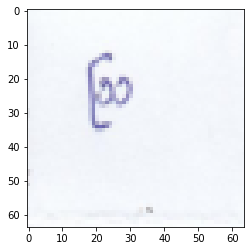

In [175]:
show_image(dataset[3200][0], dataset[3200][1])

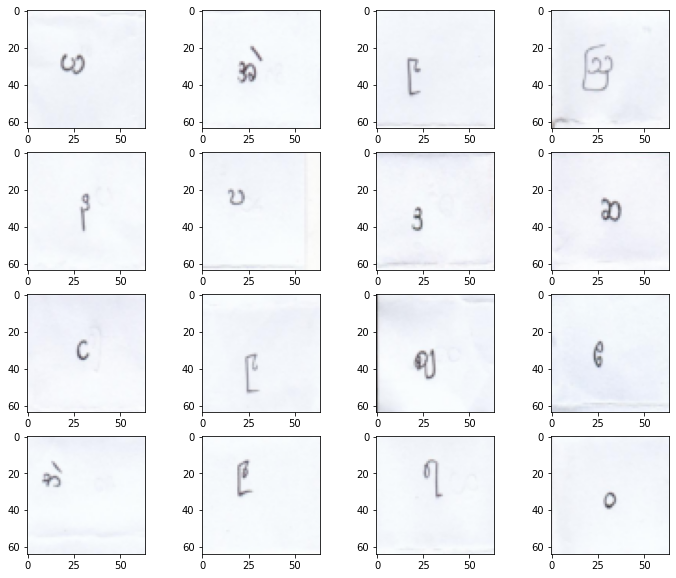

In [176]:
import random

def show_random_images():
    plt.figure(figsize=(12, 10))
    row, columns = 4, 4

    for i in range(16):
      plt.subplot(columns, row, i+1)
      plt.imshow(dataset[random.randint(0, 11978)][0].permute(1, 2, 0), cmap='Greys')

show_random_images()

In [179]:
dataset = ImageFolder(data_dir, transform=Compose([Resize((64, 64)), Grayscale(), ToTensor()]))

In [180]:
random_seed=42
torch.manual_seed(random_seed);

In [181]:
val_size = 4000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset,[train_size, val_size],generator=torch.manual_seed(random_seed))

In [182]:
len(train_ds), len(val_ds)

(7978, 4000)

In [183]:
batch_size=64
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=4, pin_memory=True )
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [184]:
train_dl

In [185]:
def show_images_batch(d1):
    for images, labels in d1:
        fig, ax= plt.subplots(figsize=(16,8))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
        break # to stop loop otherwise 4500 images in batch size of 128 will print and is computationally expensive

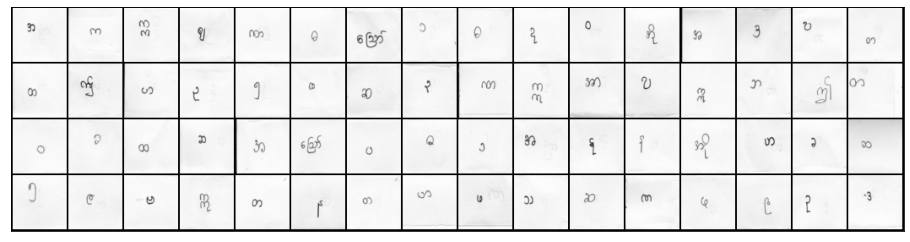

In [186]:
show_images_batch(train_dl)

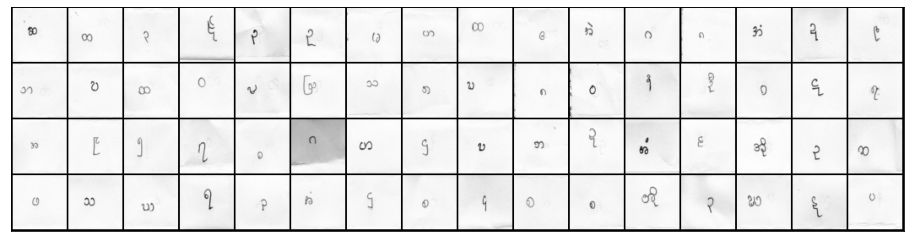

In [187]:
show_images_batch(val_dl)